In [205]:
# import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# if we want to see all columns, we set this parametr on
pd.set_option('display.max_columns', None)

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [206]:
# check dataset shape
print("Data set shape:")
df.shape

Data set shape:


(7043, 21)

In [207]:
#check detailed information about every column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [208]:
columns= []
# iterating the columns 
for col in df.columns: 
    columns.append(col)
    print(col) 
print(f'all columns:{columns}')

customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn
all columns:['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [209]:
print("Number of rows: {0}, number of columns: {1}".format(df.shape[0], df.shape[1]))
sum_ = pd.DataFrame(df.dtypes, columns=['dtypes'])
sum_ = sum_.reset_index()
sum_['Name'] = sum_['index']
sum_ = sum_[['Name', 'dtypes']]
sum_['Missing'] = df.isnull().sum().values    
sum_['Uniques'] = df.nunique().values
sum_['First Row'] = df.loc[0].values
sum_['Last Row'] = df.loc[df.shape[0]-1].values

print(sum_)

Number of rows: 7043, number of columns: 21
                Name   dtypes  Missing  Uniques         First Row  \
0         customerID   object        0     7043        7590-VHVEG   
1             gender   object        0        2            Female   
2      SeniorCitizen    int64        0        2                 0   
3            Partner   object        0        2               Yes   
4         Dependents   object        0        2                No   
5             tenure    int64        0       73                 1   
6       PhoneService   object        0        2                No   
7      MultipleLines   object        0        3  No phone service   
8    InternetService   object        0        3               DSL   
9     OnlineSecurity   object        0        3                No   
10      OnlineBackup   object        0        3               Yes   
11  DeviceProtection   object        0        3                No   
12       TechSupport   object        0        3            

In [210]:
df.head() # shows first 5 rows
df.tail() # shows 5 rows
df.columns # return list with all column names
df.shape # return number of rows and columns
df.info() # return info about dataframe

# count unique values in a column
for col in df.columns:
    df[col].value_counts(dropna=False) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [211]:
# count unique values in a column
for col in df.columns:
    print(df[col].value_counts(dropna=False))

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    15

In [212]:
def sum_info(df):
    print("Number of rows: {0}, number of columns: {1}".format(df.shape[0], df.shape[1]))
    info = pd.DataFrame(df.dtypes, columns=['dtypes'])
    info = info.reset_index()
    info['Name'] = info['index']
    info = info[['Name', 'dtypes']]
    info['Uniques'] = df.nunique().values
    for i in range(0,2):
        info['Row N'+str(i+1)] = df.loc[i].values
    info['Last Row'] = df.loc[df.shape[0]-1].values

    return info

In [213]:
sum_info(df)

Number of rows: 7043, number of columns: 21


,Name,dtypes,Uniques,Row N1,Row N2,Last Row
0,customerID,object,7043,7590-VHVEG,5575-GNVDE,3186-AJIEK
1,gender,object,2,Female,Male,Male
2,SeniorCitizen,int64,2,0,0,0
3,Partner,object,2,Yes,No,No
4,Dependents,object,2,No,No,No
5,tenure,int64,73,1,34,66
6,PhoneService,object,2,No,Yes,Yes
7,MultipleLines,object,3,No phone service,No,No
8,InternetService,object,3,DSL,DSL,Fiber optic
9,OnlineSecurity,object,3,No,Yes,Yes


In [214]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [215]:
# for each column set all letters to lower case
df.columns = map(str.lower, df.columns)
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [216]:
df.duplicated().any()

False

In [217]:
df.isnull().sum(axis = 0)

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [218]:
for col in df.columns:
    df1 = df[col].value_counts().sort_values(axis=0)
    print(col,"\n", df1 , "\n\n")

customerid 
 customerid
7590-VHVEG    1
9237-HQITU    1
9305-CDSKC    1
1452-KIOVK    1
6713-OKOMC    1
             ..
8361-LTMKD    1
1122-JWTJW    1
4807-IZYOZ    1
6894-LFHLY    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64 


gender 
 gender
Female    3488
Male      3555
Name: count, dtype: int64 


seniorcitizen 
 seniorcitizen
1    1142
0    5901
Name: count, dtype: int64 


partner 
 partner
Yes    3402
No     3641
Name: count, dtype: int64 


dependents 
 dependents
Yes    2110
No     4933
Name: count, dtype: int64 


tenure 
 tenure
0      11
36     50
44     51
39     56
28     57
     ... 
4     176
3     200
2     238
72    362
1     613
Name: count, Length: 73, dtype: int64 


phoneservice 
 phoneservice
No      682
Yes    6361
Name: count, dtype: int64 


multiplelines 
 multiplelines
No phone service     682
Yes                 2971
No                  3390
Name: count, dtype: int64 


internetservice 
 internetservice
No             1526
DSL            2421

In [219]:
df['totalcharges'] = df["totalcharges"].replace(" ",np.nan) 
df['totalcharges'].isna().sum()

11

In [220]:
# count the percentage of missing data
round(df['totalcharges'].isna().sum()/len(df)*100,5)

0.15618

In [221]:
df.loc[df["totalcharges"].isna()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [222]:
# dropping empty values from TotalCharges column which contain .15% missing data 
df.dropna(inplace=True)

In [223]:
#convert to float type
df["totalcharges"] = df["totalcharges"].astype(float)

In [224]:
df.shape

(7032, 21)

In [225]:
# customerid not useful better to drop it
df.drop(['customerid'], axis=1, inplace=True)

In [226]:
df.shape

(7032, 20)

In [227]:
#check columns
internet_cols = [ 'onlinesecurity', 'onlinebackup', 'deviceprotection',
                'techsupport','streamingtv', 'streamingmovies']
for col in internet_cols : 
    print(col,"\n", df[col].value_counts() , "\n\n") 

onlinesecurity 
 onlinesecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64 


onlinebackup 
 onlinebackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64 


deviceprotection 
 deviceprotection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64 


techsupport 
 techsupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64 


streamingtv 
 streamingtv
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64 


streamingmovies 
 streamingmovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64 




In [228]:
df.shape

(7032, 20)

In [229]:
df.to_csv("clean_churn.csv", index=False)

In [230]:
import string as st

def print_cat(df, col):
    gb = df.groupby(col)["churn"].value_counts().to_frame(name="Number of Customers").reset_index()
    print(gb)
    print('columns',gb.columns)
    t = col[:1].upper() + col[1:]
    xlabel_rotation = 0
    if len(col)>10:
        xlabel_rotation = 90
    ax = sns.barplot(
        x=col,
        y="Number of Customers",
        data=gb,
        hue="churn",
        palette=sns.color_palette("Pastel2", 2),
    )
    ax.set_title(f"{t} and relative Churn Rates in our population")
    # Annotate the bars with the exact values
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),  # Format the value as an integer
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Position above the bar
            ha='center', va='center',  # Horizontal and vertical alignment
            xytext=(0, 8),  # Offset the text by 8 points vertically
            textcoords='offset points'
        )
    
    plt.xticks(rotation=xlabel_rotation)
    plt.show()
    
    


def plot_contract(df, contract_type, y_limit):
    churn = df[(df["internetservice"] != "No") & (df["phoneservice"] == "Yes") & (df["churn"] == "Yes") & (df["contract"] == contract_type)]
    nonchurn = df[(df["internetservice"] != "No") & (df["phoneservice"] == "Yes") & (df["churn"] == "No") & (df["contract"] == contract_type)]
    bins=np.arange(0,churn['tenure'].max()+3,3)    
    plt.rcParams.update({'font.size': 16})
    plt.rcParams.update({'figure.figsize': [12.0, 5.0]})
    #title for two plots
    plt.suptitle(contract_type + ' contract')
    # compare two plots
    # first
    plt.subplot(1, 2, 1)
    plt.title("Former Customers")
    plt.xlabel("Tenure Length (Months)")
    plt.ylabel("Frequency")
    #set limits on the axes    
    plt.xlim(-2.5, 72)
    # y_limit - can be calculate
    plt.ylim(0, y_limit)
    # data for plot
    plt.hist(data=churn, x="tenure", bins=bins)

    #second
    plt.subplot(1, 2, 2)
    plt.title("Active Customers")
    plt.xlabel("Tenure Length (Months)")
    plt.ylabel("Frequency")
    # set limits on the axes
    plt.xlim(-2.5, 72)
    plt.ylim(0, y_limit)
    plt.hist(data=nonchurn, x="tenure", bins=bins)
    plt.show()

In [231]:
sns.set(style="whitegrid")

In [232]:
# read dataset
df = pd.read_csv("clean_churn.csv")
df.head(3)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [233]:
# define caterogical columns and numeric columns
cat_cols=['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice','multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']
numeric_cols=['tenure','monthlycharges', 'totalcharges']
print('Number of Categorical Features =', len(cat_cols))
print('Number of Numerical Features =', len(numeric_cols))

Number of Categorical Features = 16
Number of Numerical Features = 3


In [234]:
print(f"Churn (Target) Percentage Dustribution ", "\n",round(df['churn'].value_counts(normalize=True) * 100,2))


Churn (Target) Percentage Dustribution  
 churn
No     73.42
Yes    26.58
Name: proportion, dtype: float64


/var/folders/yt/78hhn_y52sdg3y19mf90fq180000gn/T/ipykernel_484/321896036.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Yes","No"])


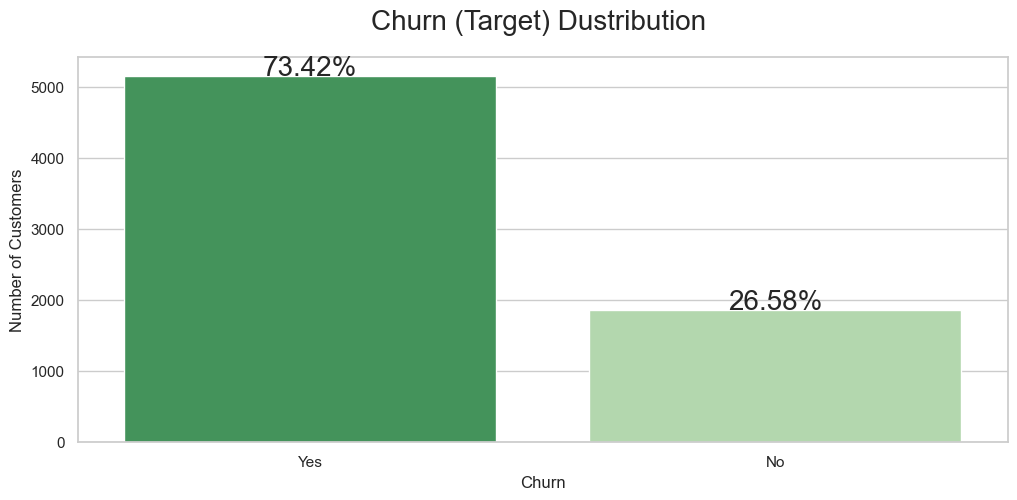

In [235]:
# one person per row
total = float(len(df))  
ax = sns.countplot(x='churn', data=df, hue='churn', palette="Greens_r", legend=False)
ax.set(xlabel='Churn',ylabel='Number of Customers')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:1.2f}'.format((height/total*100))+ '%',
            ha="center",fontsize=20) 
ax.set_xticklabels(["Yes","No"])    
plt.title(("Churn (Target) Dustribution "), fontsize = 20, pad = 20)
plt.show()

In [236]:
# Service Usage and churn/(Service Usage and churn + Service Usage and wasn't churn)
# Phone service only customers
service_churn_percent = []
service_churn_labels = []
values = df[(df["internetservice"] == "No") & (df["phoneservice"] == "Yes")]["churn"].value_counts()
service_churn_percent.append(values.iloc[1] / (values.iloc[0] + values.iloc[1]) * 100.0)
service_churn_labels.append("Phone Only") 

# Internet service only customers
values = df[(df["internetservice"] != "No") & (df["phoneservice"] == "No")]["churn"].value_counts()
service_churn_percent.append(values.iloc[1] / (values.iloc[0] + values.iloc[1]) * 100.0)
service_churn_labels.append("Internet Only")

# Phone and Internet customers
values = df[(df["internetservice"] != "No") & (df["phoneservice"] == "Yes")]["churn"].value_counts()
service_churn_percent.append(values.iloc[1] / (values.iloc[0] + values[1]) * 100.0)
service_churn_labels.append("Phone and Internet")

/var/folders/yt/78hhn_y52sdg3y19mf90fq180000gn/T/ipykernel_484/2365141752.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  service_churn_percent.append(values.iloc[1] / (values.iloc[0] + values[1]) * 100.0)


In [237]:
service_churn_percent

[7.434210526315789, 25.0, 32.8228476821192]

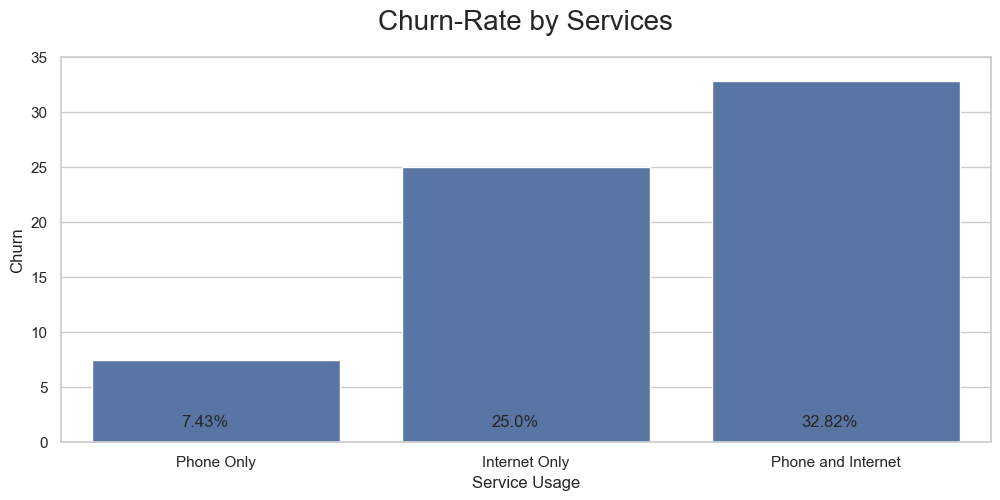

In [238]:
# Churn-Rate by Service Usage  
data = pd.DataFrame({
    'Service': service_churn_labels,
    'Churn': service_churn_percent
})
# ax = sns.barplot(service_churn_percent, service_churn_labels)
ax = sns.barplot(x='Service', y='Churn', data=data)
ax.set(xlabel='Service Usage')
for i, p in enumerate(ax.patches):
    ax.annotate((str(round(service_churn_percent[i],2))+"%"),
                (p.get_x() + p.get_width()/3, p.get_y()+0.2),
                xytext=(5, 10), textcoords='offset points')
ax.set_ylim(0,35)
plt.title(("Churn-Rate by Services"), fontsize = 20, pad =20)
plt.show()


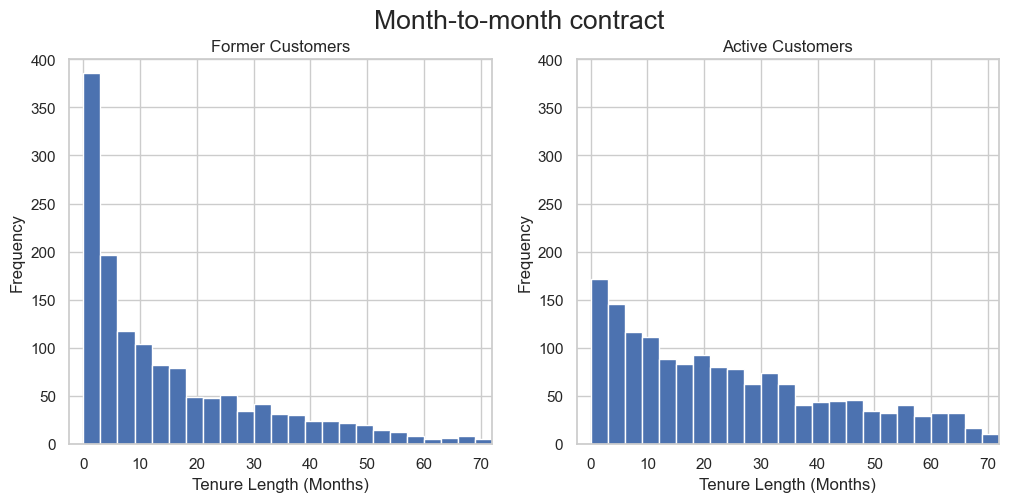

In [239]:
plot_contract(df,"Month-to-month",400)

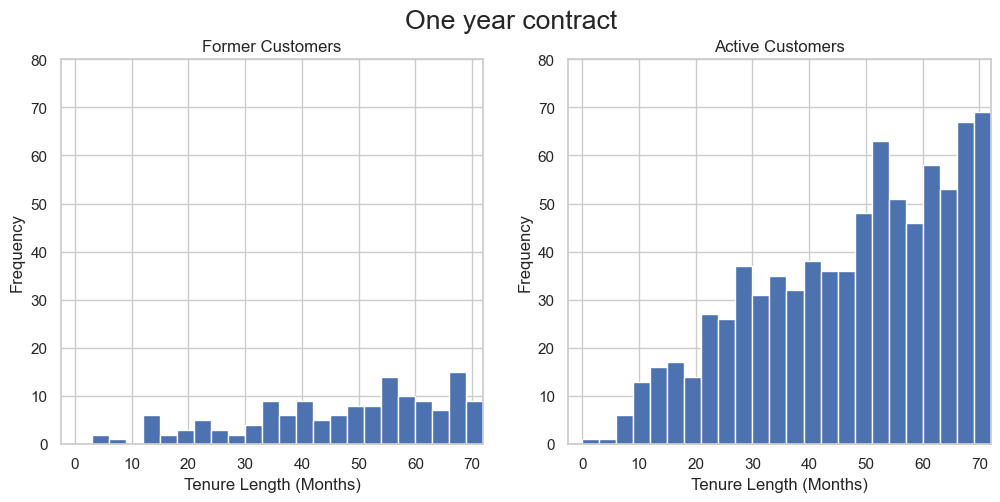

In [240]:
plot_contract(df,"One year", 80)

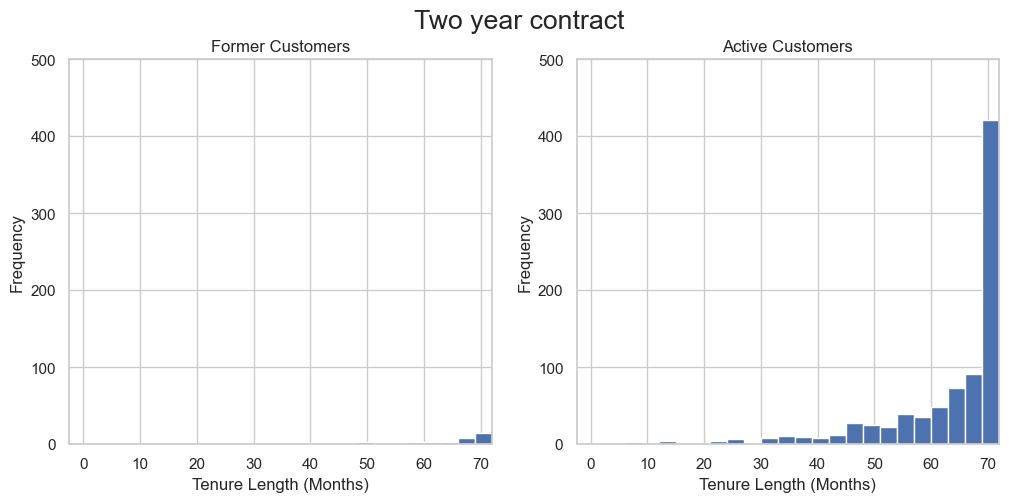

In [241]:
plot_contract(df,"Two year",500)

In [242]:
internet_cols=['onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies']

In [243]:
idf = df[(df["internetservice"] != "No")]
print(f'Dataframe shape of internet sevices:{idf.shape}')
def percent_popularity(df, col):
    values = df[(df[col] == "Yes")][col].value_counts()
    return values.iloc[0] / df.shape[0] * 100

internet_service_popularity = []
internet_service_labels = []
for i in internet_cols:
    internet_service_labels.append(i)

internet_service_popularity.append(percent_popularity(idf,'onlinesecurity'))
internet_service_popularity.append(percent_popularity(idf,'onlinebackup'))
internet_service_popularity.append(percent_popularity(idf,'deviceprotection'))
internet_service_popularity.append(percent_popularity(idf,'techsupport'))
internet_service_popularity.append(percent_popularity(idf,'streamingtv'))
internet_service_popularity.append(percent_popularity(idf,'streamingmovies'))
print(f'Internet service popularity: {internet_service_labels}')
internet_service_popularity


Dataframe shape of internet sevices:(5512, 20)
Internet service popularity: ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']


[36.556603773584904,
 43.99492017416546,
 43.86792452830189,
 37.010159651669085,
 49.03846153846153,
 49.546444121915826]

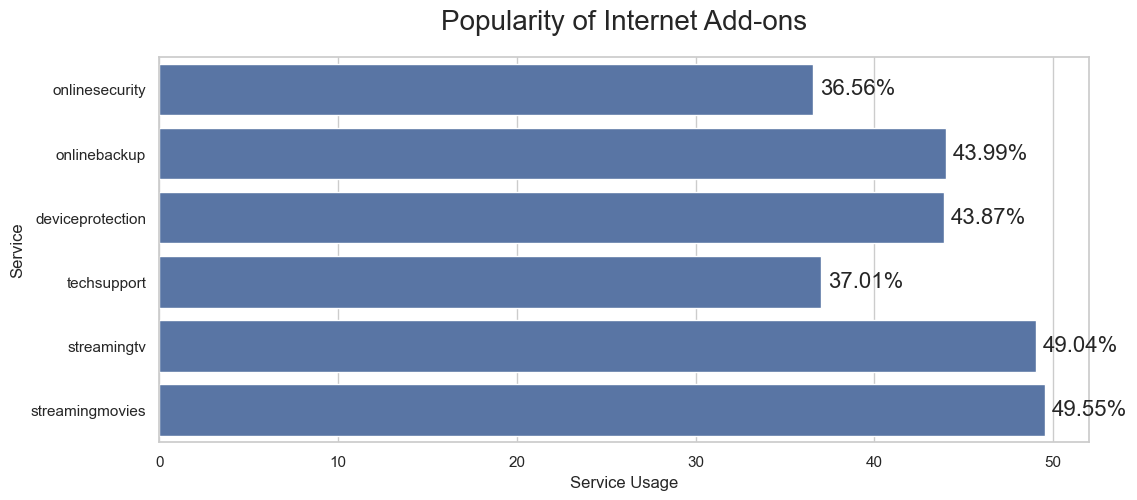

In [244]:
# Churn-Rate by Service Usage  
data = pd.DataFrame({
    'Service': internet_service_labels,
    'Churn': internet_service_popularity
})
ax = sns.barplot(x='Churn', y='Service', data=data)
# ax = sns.barplot(internet_service_popularity,internet_service_labels)
ax.set(xlabel='Service Usage')
for i, p in enumerate(ax.patches):
    ax.annotate((str(round(internet_service_popularity[i],2))+"%"),
                (p.get_x() + p.get_width(), p.get_y()+0.7),
                xytext=(5, 10), textcoords='offset points')
plt.title(("Popularity of Internet Add-ons"), fontsize = 20, pad =20)
plt.show()

In [245]:
# watch TV and movies
print('Customers with Streaming TV and Movies:',idf[(idf["streamingtv"] == "Yes")&(idf["streamingmovies"] == "Yes")].shape[0])
# watch only TV 
print('Customers with Streaming TV only:',idf[(idf["streamingtv"] == "Yes")&(idf["streamingmovies"] == "No")].shape[0])
# watch only movies
print('Customers with Streaming Movies only:',idf[(idf["streamingtv"] == "No")&(idf["streamingmovies"] == "Yes")].shape[0])
# percent of usage movies vs. TV
print('Percent customers who prefer Streaming Movies only:',round(idf[(idf["streamingtv"] == "No")&(idf["streamingmovies"] == "Yes")].shape[0]/idf[(idf["streamingtv"] == "Yes")].shape[0]*100,2))


Customers with Streaming TV and Movies: 1939
Customers with Streaming TV only: 764
Customers with Streaming Movies only: 792
Percent customers who prefer Streaming Movies only: 29.3


In [246]:
#check for mistakes
df[(df["internetservice"] == "No")&((df["streamingtv"] == "Yes")|(df["streamingmovies"] == "Yes")|(df["onlinesecurity"] == "Yes")|(df["onlinebackup"] == "Yes"))]


,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


In [247]:
df["streaming"] = np.where((df["streamingmovies"] == "Yes"),"Yes","No")
df.head(3)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,streaming
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No


In [248]:
df[df['churn'] == 'Yes'].streamingtv.value_counts(normalize=True)
df[df['churn'] == 'No'].streamingtv.value_counts(normalize=True)
df[df['churn'] == 'Yes'].streamingmovies.value_counts(normalize=True)
df[df['churn'] == 'No'].streamingmovies.value_counts(normalize=True)

streamingmovies
Yes                    0.370521
No                     0.356963
No internet service    0.272516
Name: proportion, dtype: float64

In [249]:
# percent of usage movies vs. TV
print('Percent customers who prefer Streaming Movies only:',round(df[(df["streamingtv"] == "No")&(df["streamingmovies"] == "Yes")].shape[0]/df[(df["streamingtv"] == "Yes")].shape[0]*100,2))

Percent customers who prefer Streaming Movies only: 29.3


In [250]:
print('Use Multiple Lines: ',df[(df["phoneservice"] == "Yes")&(df["multiplelines"] == "Yes")].shape[0],' == ',round(df[(df["phoneservice"] == "Yes")&(df["multiplelines"] == "Yes")].shape[0]/df[(df["phoneservice"] == "Yes")].shape[0]*100,2))
print('Use only one Line: ',df[(df["phoneservice"] == "Yes")&(df["multiplelines"] == "No")].shape[0],' == ',round(df[(df["phoneservice"] == "Yes")&(df["multiplelines"] == "No")].shape[0]/df[(df["phoneservice"] == "Yes")].shape[0]*100,2))

Use Multiple Lines:  2967  ==  46.71
Use only one Line:  3385  ==  53.29


In [251]:
revenue_services = []
revenue_services_labels = []

# Phone service only customers
revenue_services.append(df[(df["internetservice"] == "No") & (df["phoneservice"] == "Yes")]["totalcharges"].sum())
revenue_services_labels.append("Phone Only")

# Internet service only customers
revenue_services.append(df[(df["internetservice"] != "No") & (df["phoneservice"] == "No")]["totalcharges"].sum())
revenue_services_labels.append("Internet Only")

# Phone  and Internet customers
revenue_services.append(df[(df["internetservice"] != "No") & (df["phoneservice"] == "Yes")]["totalcharges"].sum())
revenue_services_labels.append("Phone and Internet")


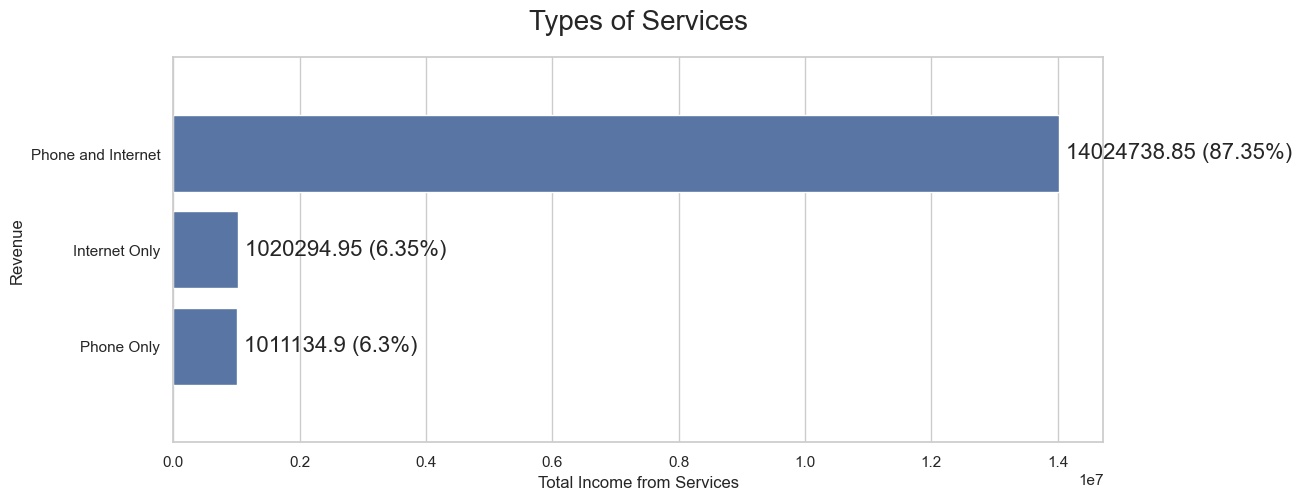

In [252]:
# Churn-Rate by Service Usage  
total=df["totalcharges"].sum()
data = pd.DataFrame({
    'Revenue': revenue_services_labels,
    'Revenue services': revenue_services
})
ax = sns.barplot(x='Revenue services', y='Revenue', data=data)
ax.set(xlabel='Total Income from Services')
for i, p in enumerate(ax.patches):
    ax.annotate(str(round(revenue_services[i],2))+' ('+str(round(revenue_services[i]/total*100,2))+'%)',
                (p.get_x() + p.get_width(), p.get_y()+0.2),
                xytext=(5, 10), textcoords='offset points')
ax.set_ylim(-1,3)
plt.title(("Types of Services"), fontsize = 20, pad =20)
plt.show()

   gender churn  Number of Customers
0  Female    No                 2544
1  Female   Yes                  939
2    Male    No                 2619
3    Male   Yes                  930
columns Index(['gender', 'churn', 'Number of Customers'], dtype='object')


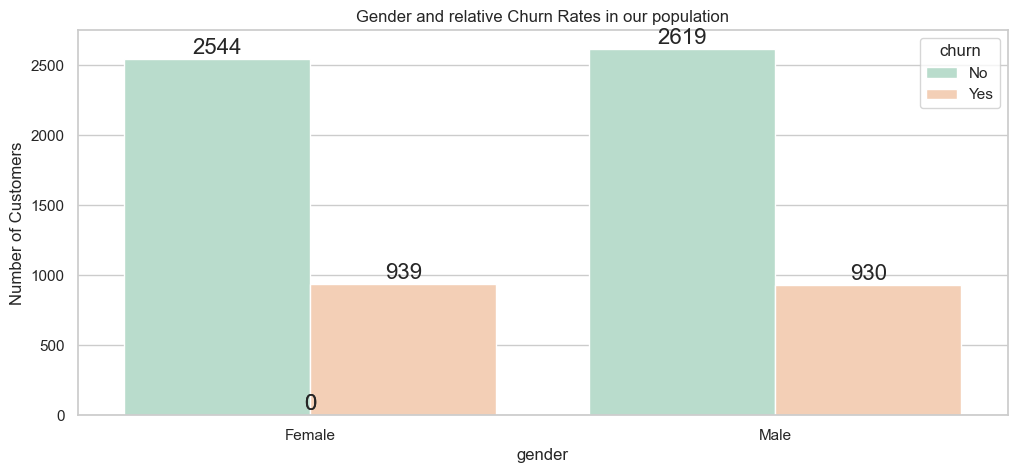

   seniorcitizen churn  Number of Customers
0              0    No                 4497
1              0   Yes                 1393
2              1    No                  666
3              1   Yes                  476
columns Index(['seniorcitizen', 'churn', 'Number of Customers'], dtype='object')


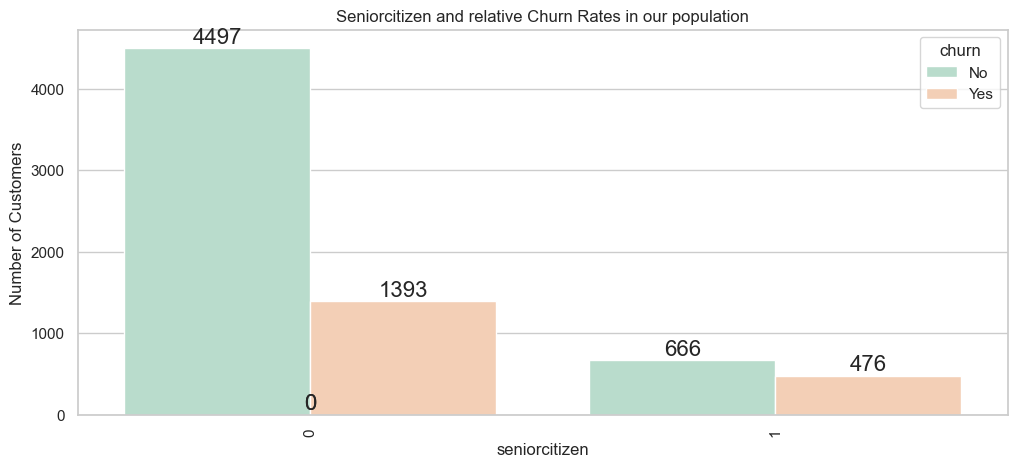

  partner churn  Number of Customers
0      No    No                 2439
1      No   Yes                 1200
2     Yes    No                 2724
3     Yes   Yes                  669
columns Index(['partner', 'churn', 'Number of Customers'], dtype='object')


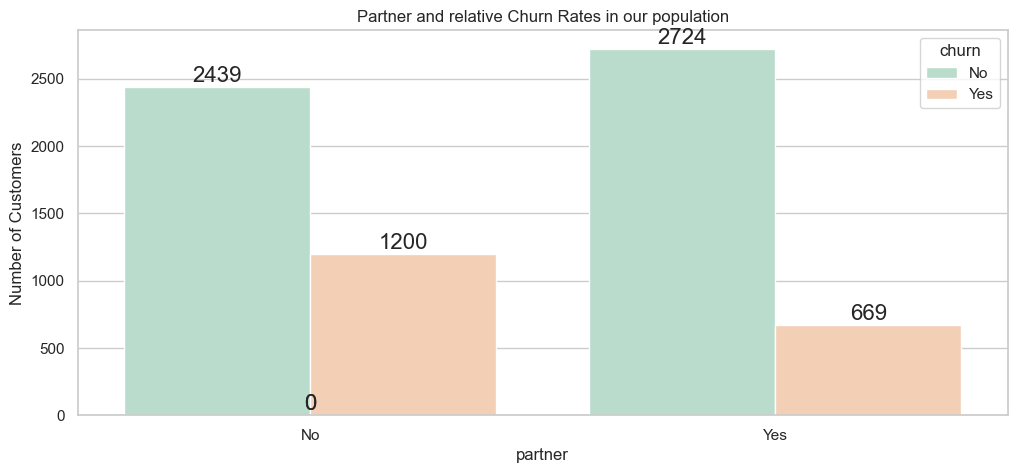

  dependents churn  Number of Customers
0         No    No                 3390
1         No   Yes                 1543
2        Yes    No                 1773
3        Yes   Yes                  326
columns Index(['dependents', 'churn', 'Number of Customers'], dtype='object')


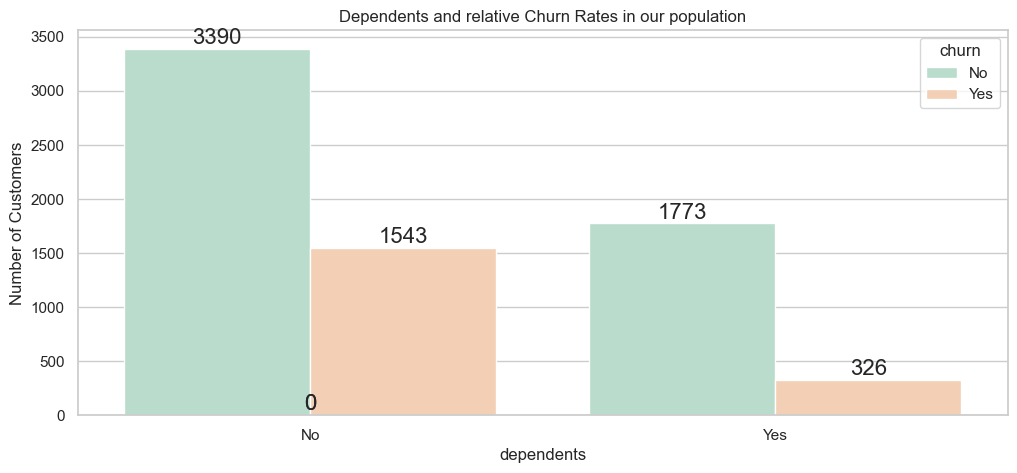

  phoneservice churn  Number of Customers
0           No    No                  510
1           No   Yes                  170
2          Yes    No                 4653
3          Yes   Yes                 1699
columns Index(['phoneservice', 'churn', 'Number of Customers'], dtype='object')


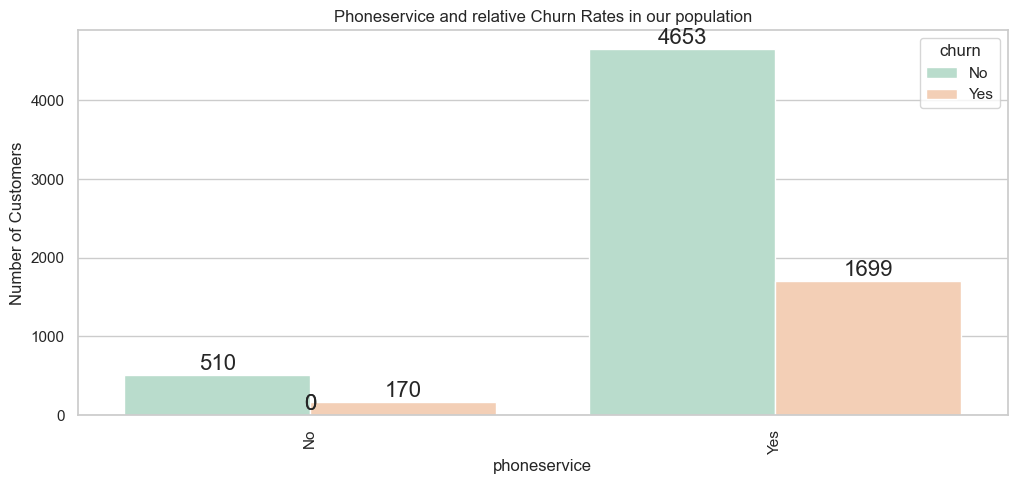

      multiplelines churn  Number of Customers
0                No    No                 2536
1                No   Yes                  849
2  No phone service    No                  510
3  No phone service   Yes                  170
4               Yes    No                 2117
5               Yes   Yes                  850
columns Index(['multiplelines', 'churn', 'Number of Customers'], dtype='object')


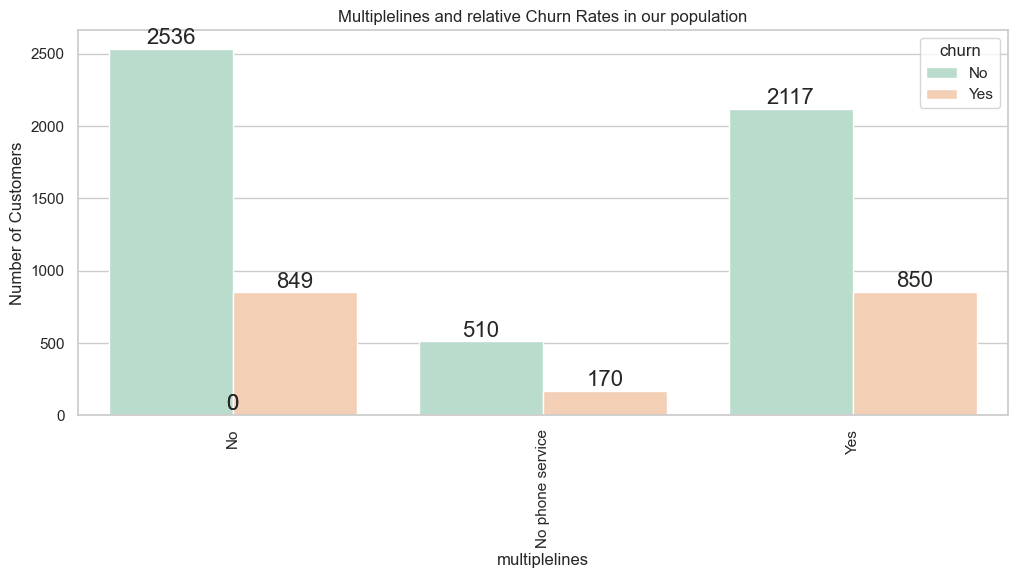

  internetservice churn  Number of Customers
0             DSL    No                 1957
1             DSL   Yes                  459
2     Fiber optic    No                 1799
3     Fiber optic   Yes                 1297
4              No    No                 1407
5              No   Yes                  113
columns Index(['internetservice', 'churn', 'Number of Customers'], dtype='object')


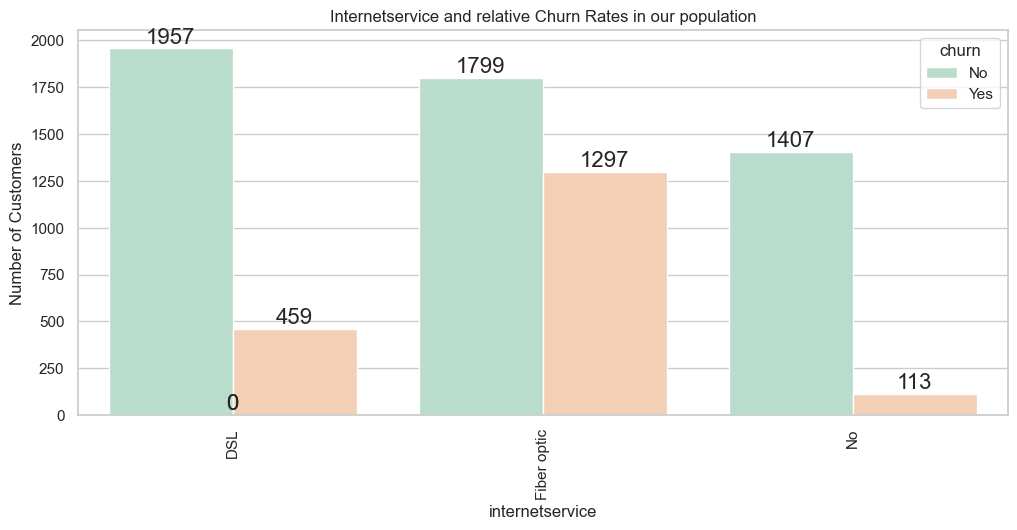

        onlinesecurity churn  Number of Customers
0                   No    No                 2036
1                   No   Yes                 1461
2  No internet service    No                 1407
3  No internet service   Yes                  113
4                  Yes    No                 1720
5                  Yes   Yes                  295
columns Index(['onlinesecurity', 'churn', 'Number of Customers'], dtype='object')


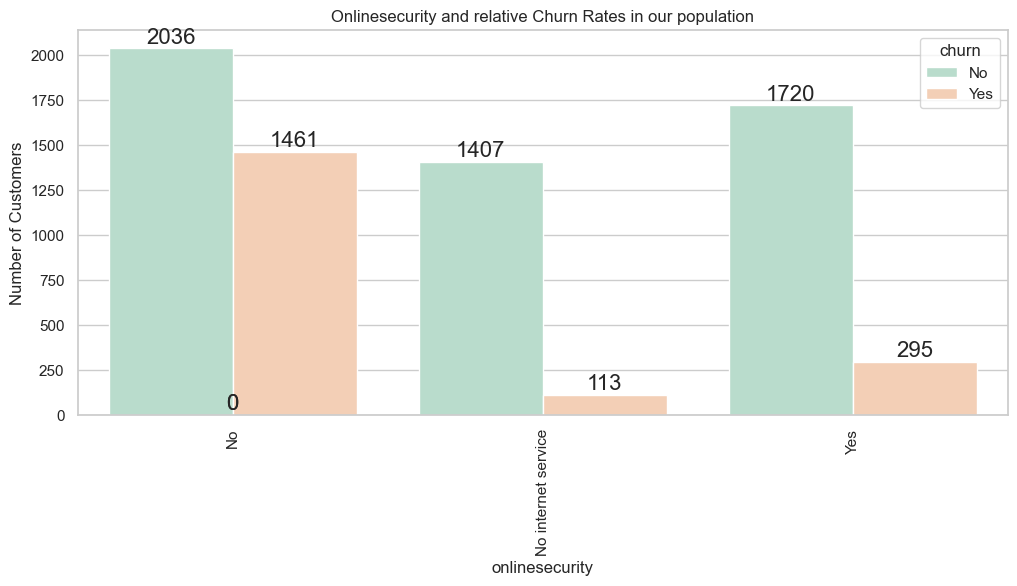

          onlinebackup churn  Number of Customers
0                   No    No                 1854
1                   No   Yes                 1233
2  No internet service    No                 1407
3  No internet service   Yes                  113
4                  Yes    No                 1902
5                  Yes   Yes                  523
columns Index(['onlinebackup', 'churn', 'Number of Customers'], dtype='object')


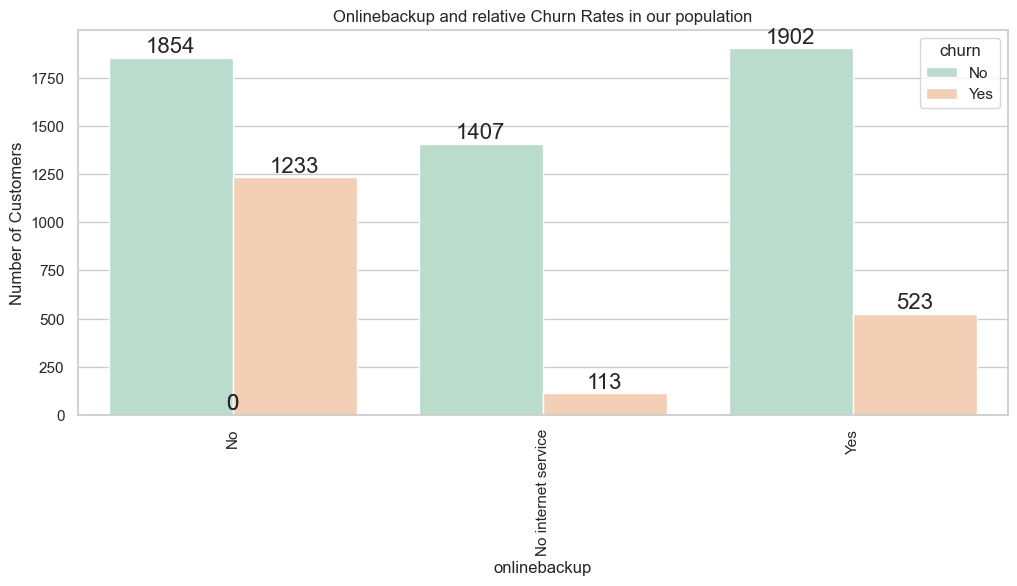

      deviceprotection churn  Number of Customers
0                   No    No                 1883
1                   No   Yes                 1211
2  No internet service    No                 1407
3  No internet service   Yes                  113
4                  Yes    No                 1873
5                  Yes   Yes                  545
columns Index(['deviceprotection', 'churn', 'Number of Customers'], dtype='object')


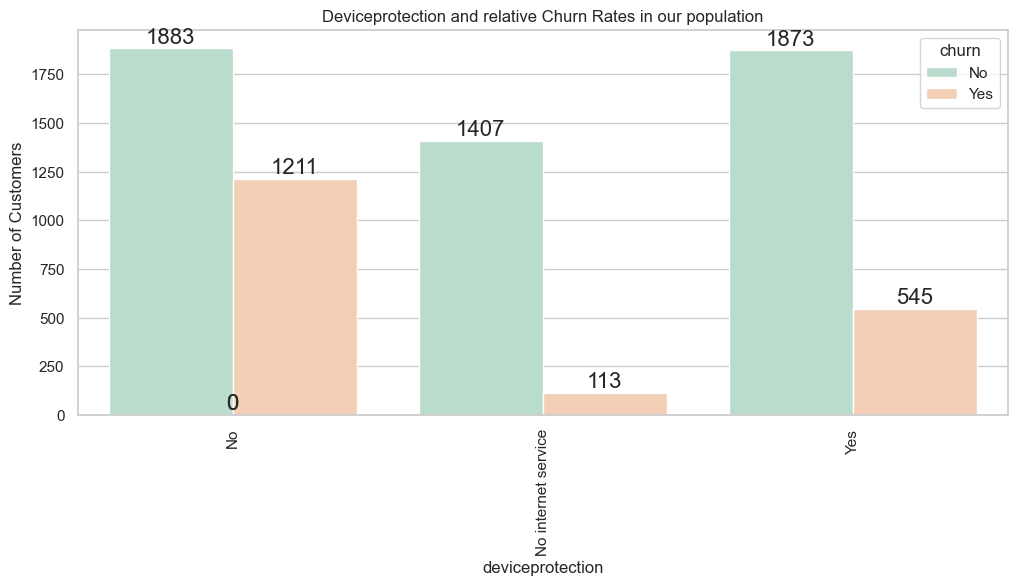

           techsupport churn  Number of Customers
0                   No    No                 2026
1                   No   Yes                 1446
2  No internet service    No                 1407
3  No internet service   Yes                  113
4                  Yes    No                 1730
5                  Yes   Yes                  310
columns Index(['techsupport', 'churn', 'Number of Customers'], dtype='object')


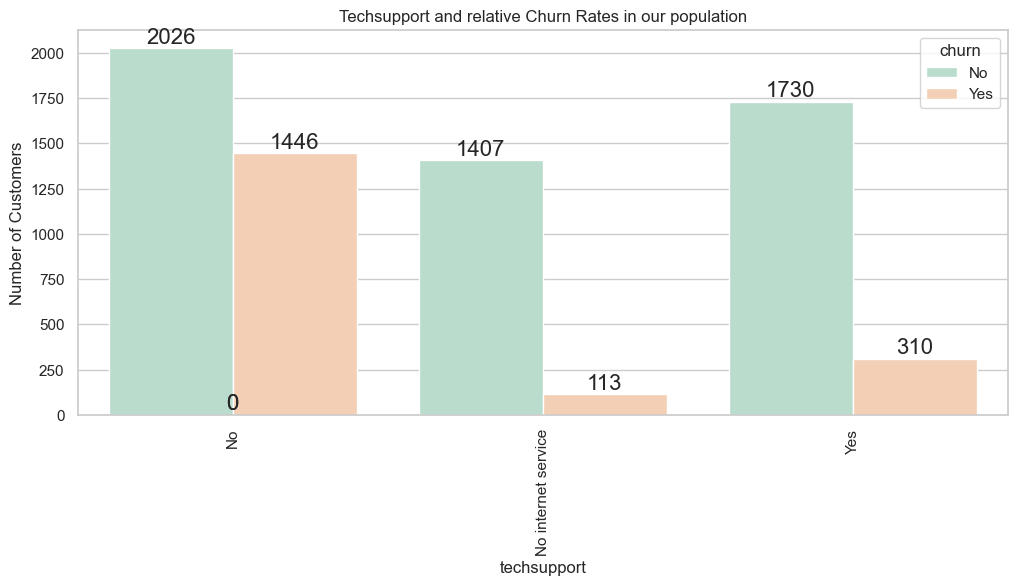

           streamingtv churn  Number of Customers
0                   No    No                 1867
1                   No   Yes                  942
2  No internet service    No                 1407
3  No internet service   Yes                  113
4                  Yes    No                 1889
5                  Yes   Yes                  814
columns Index(['streamingtv', 'churn', 'Number of Customers'], dtype='object')


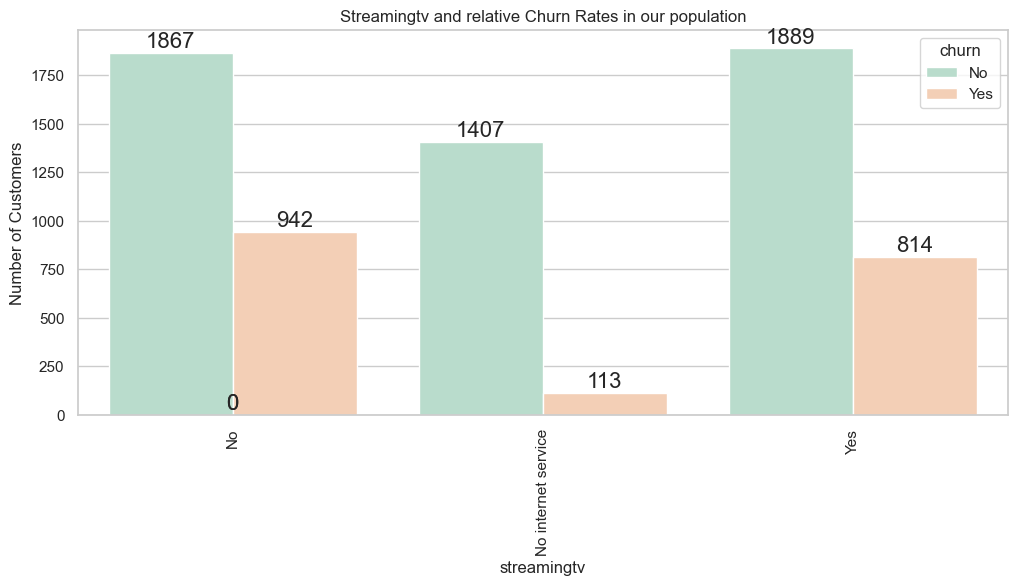

       streamingmovies churn  Number of Customers
0                   No    No                 1843
1                   No   Yes                  938
2  No internet service    No                 1407
3  No internet service   Yes                  113
4                  Yes    No                 1913
5                  Yes   Yes                  818
columns Index(['streamingmovies', 'churn', 'Number of Customers'], dtype='object')


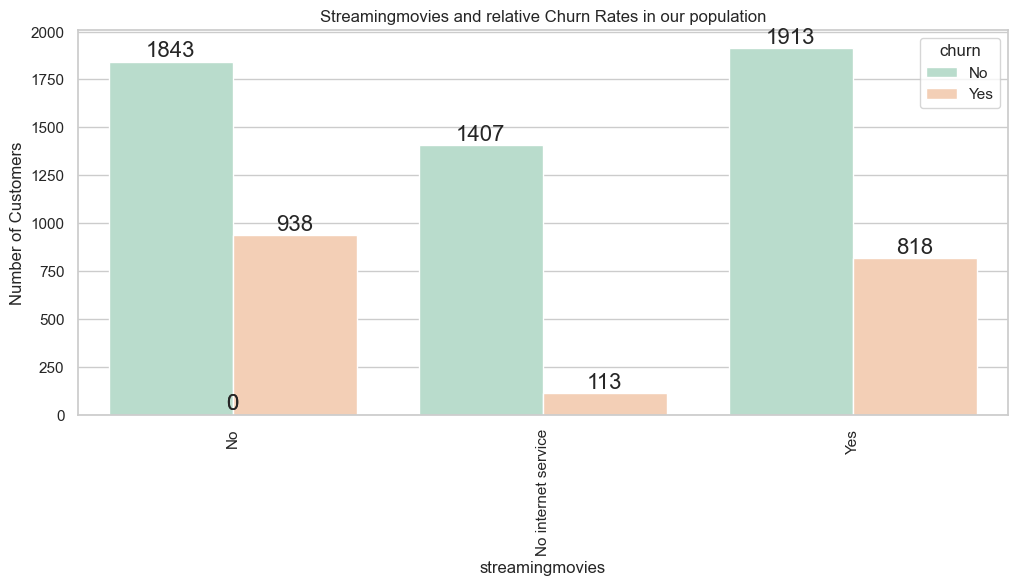

         contract churn  Number of Customers
0  Month-to-month    No                 2220
1  Month-to-month   Yes                 1655
2        One year    No                 1306
3        One year   Yes                  166
4        Two year    No                 1637
5        Two year   Yes                   48
columns Index(['contract', 'churn', 'Number of Customers'], dtype='object')


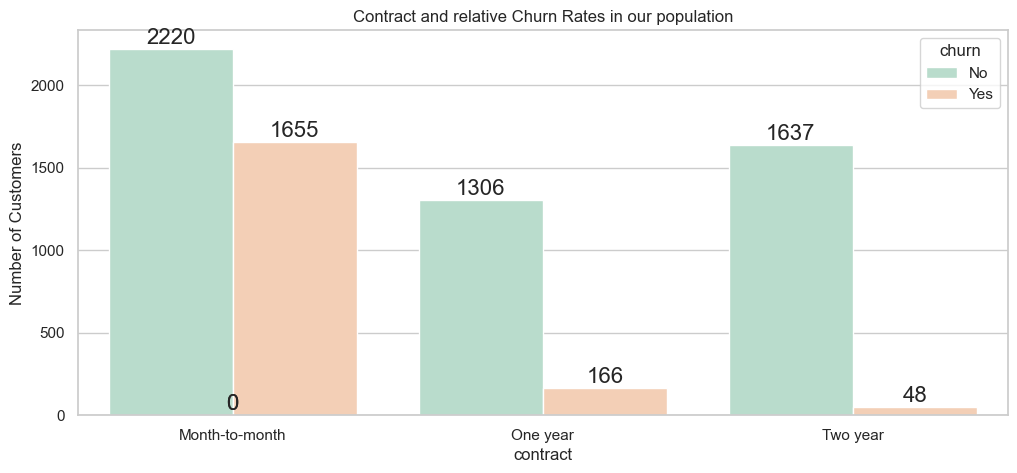

  paperlessbilling churn  Number of Customers
0               No    No                 2395
1               No   Yes                  469
2              Yes    No                 2768
3              Yes   Yes                 1400
columns Index(['paperlessbilling', 'churn', 'Number of Customers'], dtype='object')


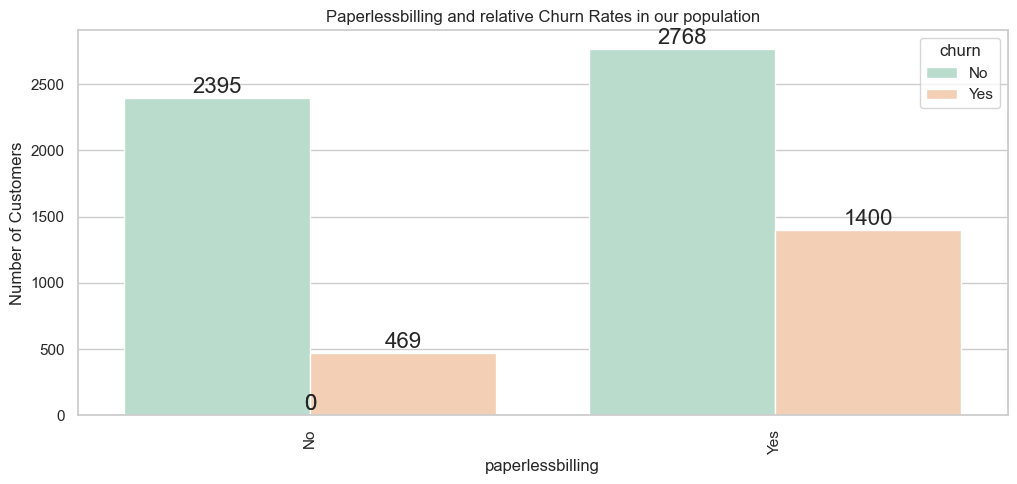

               paymentmethod churn  Number of Customers
0  Bank transfer (automatic)    No                 1284
1  Bank transfer (automatic)   Yes                  258
2    Credit card (automatic)    No                 1289
3    Credit card (automatic)   Yes                  232
4           Electronic check    No                 1294
5           Electronic check   Yes                 1071
6               Mailed check    No                 1296
7               Mailed check   Yes                  308
columns Index(['paymentmethod', 'churn', 'Number of Customers'], dtype='object')


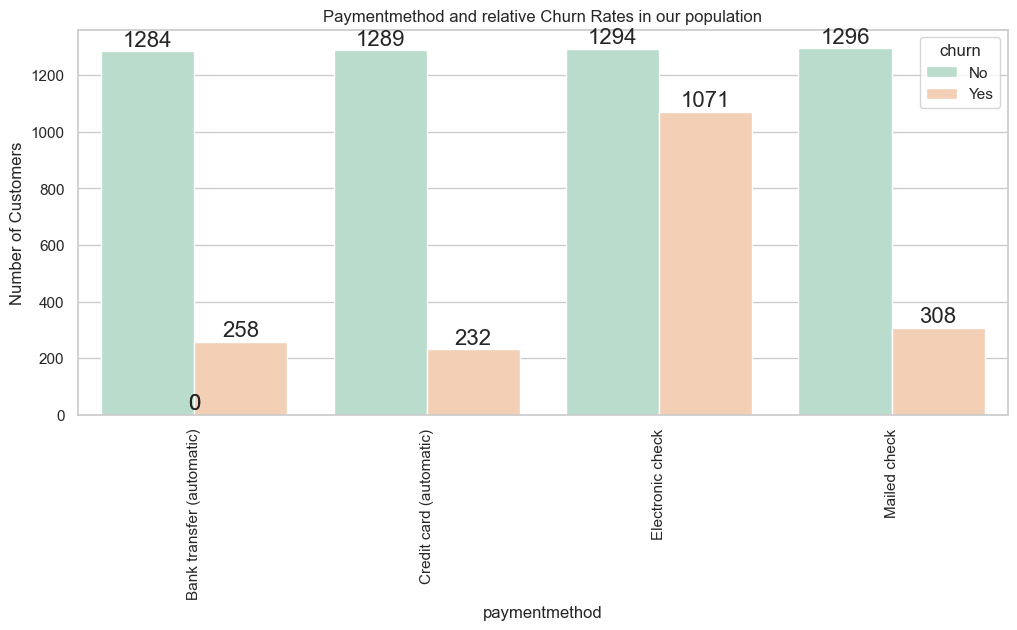

In [253]:
for i in cat_cols:
    print_cat(df,i)

Using our graphs we can say:\
Gender: it seems to be an equal distribution of males and females with respect to churn intention (guess that gender is not important feature)\
Senior citizen: There are much fewer senior citizens and there is a larger proportion of senior citizens churning. In the churn plot shows more young people are churning. (can be important)\
Partner: People with partners and without partners have almost the same distribution of not churning, single people have more intention to churn. (can be important)\
Dependents: There are much fewer people with dependents, there is a larger proportion of people with no dependents churning (looks like an important feature)\
Phone Service: There are many more people with a phone service, almost the same intention of churn with people having phone service. (it should be important feature, but we need more explore it)\
Multiple Lines: The numbers of people who have and do not have multiple lines are almost the same with respect to churn intention.(not important, but should be explore with partner and dependent)\
Internet Service: There are many more people who have an internet service either with DSL or fiber, but there is a large proportion of people with fiber optic internet service who churn. (can expect that it is going to be an important prediction feature especially with Fiber Optic)\
Online Security: there are more people with no online security and a larger proportion of the people has online security, has not churned. (customers having online security tend to stay within company compared to customers without online security) \
Online Backup: There are more people with no online backup and those who has online backup has less probability of churn (customers having OnlineBackup tend to stay within company compared to customers without OnlineBackup)\
Device Protection: There are more people with no device protection and those who have DeviceProtection has less probability to churn.(the same with previous)\
Tech Support: there are more people with no tech support and those who have tech support have less probability to churn.(the same with previous)\
Streaming TV: it seems to be almost an equal distribution of people who did and did not have streaming tv with respect to churn intention.
Streaming Movies: there are more people with no streaming movies and those who have streaming movies have more probability to churn.\
Contract: There are many more people who are on a month-to-month contract and a large proportion of this group of people has churned. People with one year contracts are less churn. People with two years contracts are the least people may churn.(is one of the most important feature)\
Paperless Billing: The number of people with paperless billing has quite larger proportion in people who has churned\
PaymentMethod: There are more people adopting electronic check as a payment method and a large proportion of them have churned.\
\
Conclusion, based on our analyses, we can see the more services added the less people churn. Gender is not a feature, phone service and multiple lines aren't service.

------
Lets now explore the churn rate by tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.

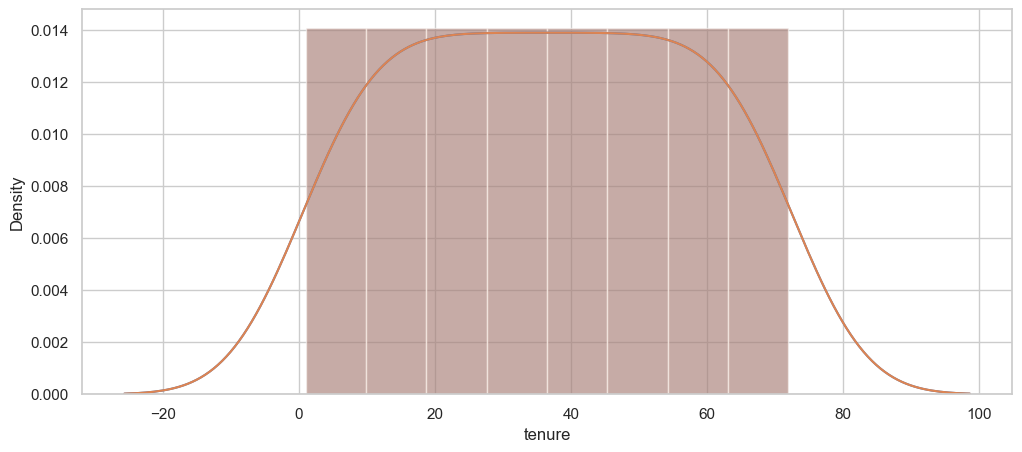

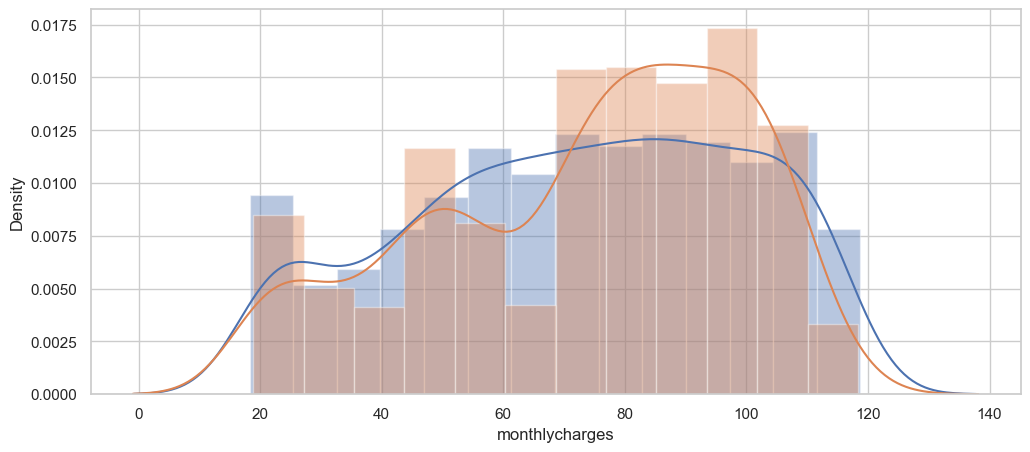

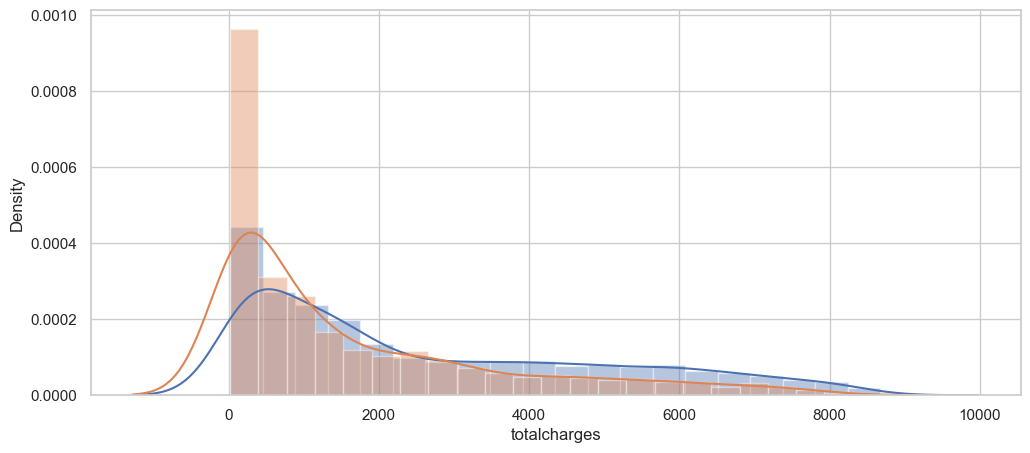

In [254]:
for col in numeric_cols: 
    gb = df.groupby(col)["churn"].value_counts().to_frame().rename({"churn": "Number of Customers"}, axis = 1).reset_index()
    gb1 = gb.loc[gb["churn"]=="No"]
    gb2 = gb.loc[gb["churn"]=="Yes"]
    sns.histplot(gb1[col], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4),)
    sns.histplot(gb2[col], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4),)
    plt.show()


In [255]:
quant_col = df[['tenure', 'monthlycharges', 'totalcharges']]
quant_col.describe()

,tenure,monthlycharges,totalcharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


<Figure size 1500x1000 with 0 Axes>

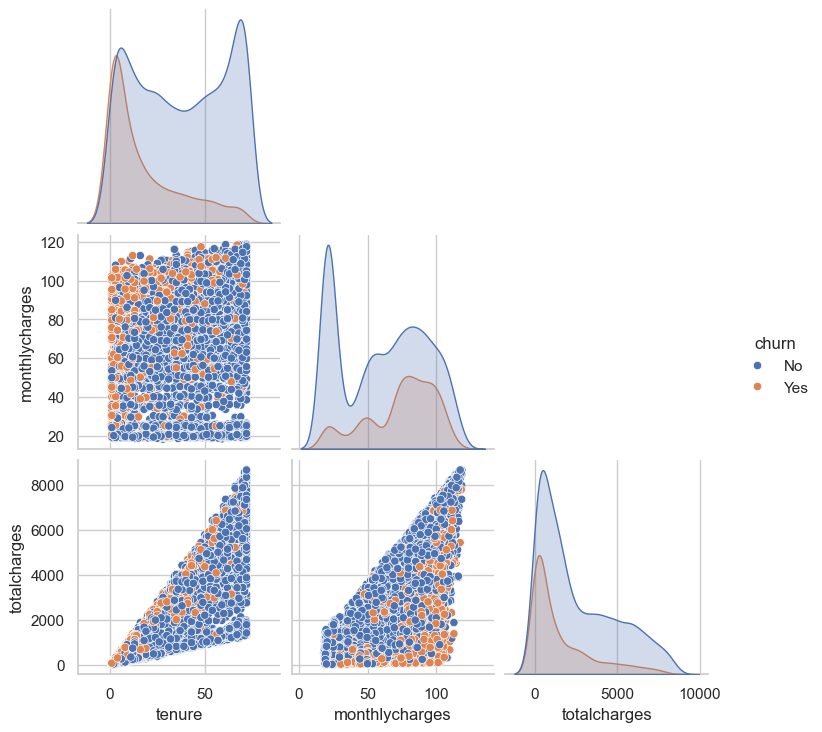

In [256]:
# for better wiew we compare this graphs by pairplot
plt.figure(figsize=(15, 10))
sns.pairplot(df, vars=['tenure', 'monthlycharges', 'totalcharges'], 
             hue='churn', diag_kind='kde',corner=True)
plt.show()

tenure            2
monthlycharges    1
totalcharges      2
dtype: int64


(<Axes: >, None)

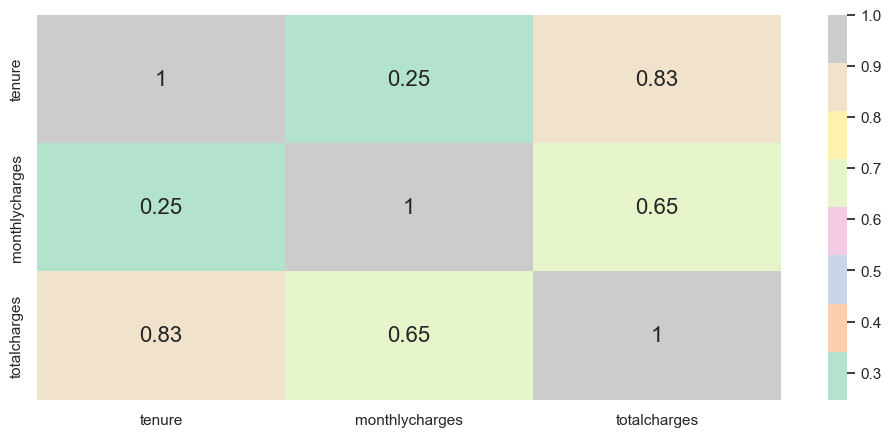

In [257]:
#make_heatmap(df, ['tenure', 'monthlycharges', 'totalcharges'])
sns.heatmap(df[['tenure', 'monthlycharges', 'totalcharges']].corr(),annot=True,cmap='Pastel2'),print(abs(df[['tenure', 'monthlycharges', 'totalcharges']].corr()>.75).sum())

<Figure size 1500x1000 with 0 Axes>

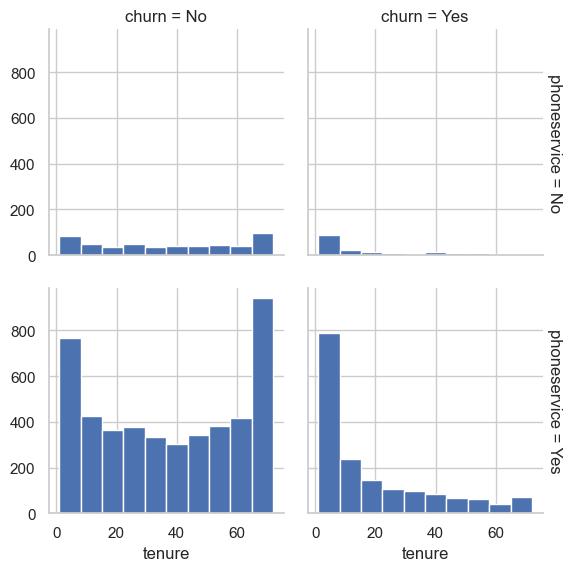

In [258]:
plt.figure(figsize=(15,10))
g = sns.FacetGrid(df, col='churn', row='phoneservice', margin_titles=True)
g.map(plt.hist, 'tenure')
plt.show()

In [259]:
# Can we create column Family where partner == YES and dependent == YES
df["huge_family"] = np.where(((df["partner"]=='Yes') & (df["dependents"]=='Yes')),1,0)
df[df["huge_family"]==1]

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,streaming,huge_family
10,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No,No,1
15,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No,Yes,1
18,Female,0,Yes,Yes,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,No,1
24,Male,0,Yes,Yes,49,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.60,2970.30,No,No,1
26,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes,No,1
7009,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,No,No,1
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,Yes,1
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,Yes,1


   huge_family churn  Number of Customers
0            0    No                 3672
1            0   Yes                 1620
2            1    No                 1491
3            1   Yes                  249
columns Index(['huge_family', 'churn', 'Number of Customers'], dtype='object')


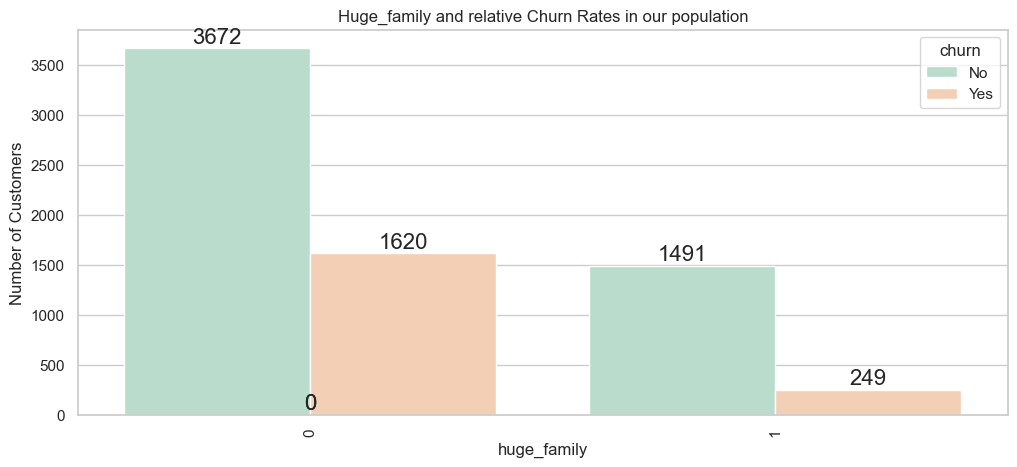

In [260]:
print_cat(df,'huge_family')

/var/folders/yt/78hhn_y52sdg3y19mf90fq180000gn/T/ipykernel_484/4227877693.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='internetservice', data=df,  palette="Blues_d")


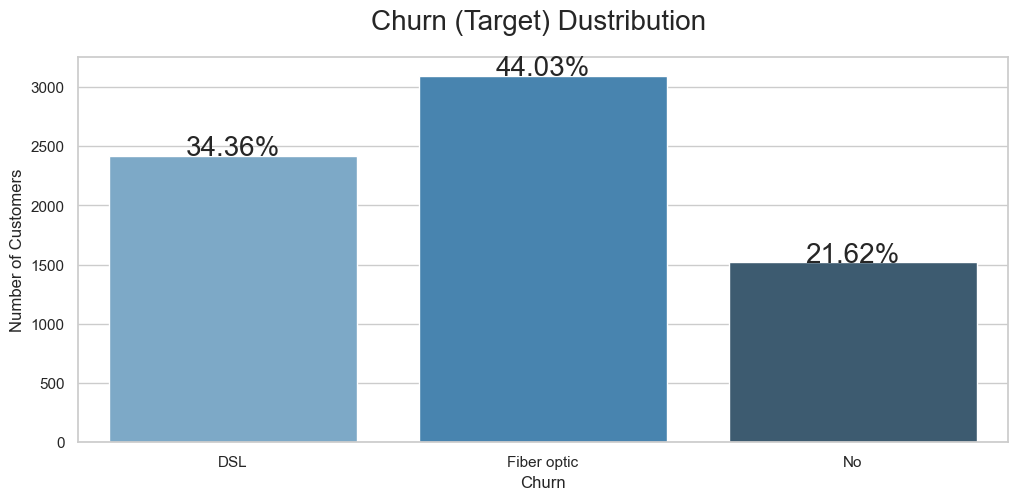

In [261]:
# one person per row
total = float(len(df))  
ax = sns.countplot(x='internetservice', data=df,  palette="Blues_d")
ax.set(xlabel='Churn',ylabel='Number of Customers')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:1.2f}'.format((height/total*100))+ '%',
            ha="center",fontsize=20) 
plt.title(("Churn (Target) Dustribution "), fontsize = 20, pad =20)
plt.show()

<Axes: xlabel='churn', ylabel='count'>

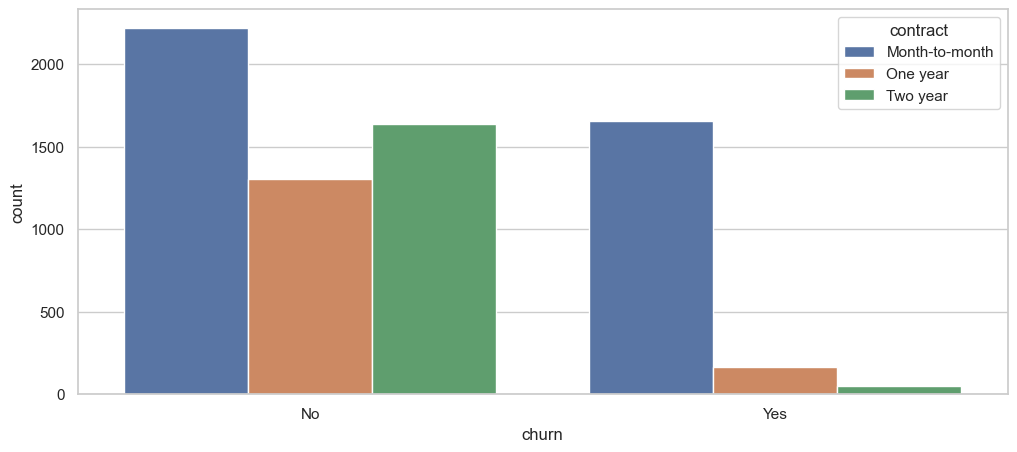

In [262]:
sns.countplot(x="churn", hue="contract", data=df)

In [263]:
df['tenure'] = df['tenure'].astype(int) 
unexpected_rows = df[~df['churn'].isin(['No', 'Yes'])]
print(unexpected_rows)
# Apply map and handle NA values by filling them with 0 (or 1)
df['churn'] = df['churn'].map({'No': 0, 'Yes': 1}).astype(int)
df.head(3)

Empty DataFrame
Columns: [gender, seniorcitizen, partner, dependents, tenure, phoneservice, multiplelines, internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, contract, paperlessbilling, paymentmethod, monthlycharges, totalcharges, churn, streaming, huge_family]
Index: []


,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,streaming,huge_family
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,No,0


In [271]:
# Check the data type of the 'churn' column
print(f"Data type of 'churn' column: {df['churn'].dtype}")
# Print unique values in the 'churn' column to inspect for unexpected values
print("Unique values in 'churn' column:")
print(df['churn'].unique())


# Perform the mapping (ensure any non-'No'/'Yes' values are handled)
# Only map if the column contains 'No' and 'Yes'
if df['churn'].dtype == 'object':
    df['churn'] = df['churn'].map({'No': 0, 'Yes': 1}).astype(int)
else:
    print("No mapping needed; column is already numeric.")
print("Mapped 'churn' column:")
print(df['churn'].unique())

# Now check for any rows with unexpected values
# unexpected_rows = df[df['churn'] == -1]
# print("Rows with unexpected values in 'churn':")
# print(unexpected_rows)

Data type of 'churn' column: int64
Unique values in 'churn' column:
[0 1]
No mapping needed; column is already numeric.
Mapped 'churn' column:
[0 1]


In [272]:
df.head(3)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,streaming,huge_family
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,No,0


Text(0.5, 1.0, 'Count of  Customers by their tenure')

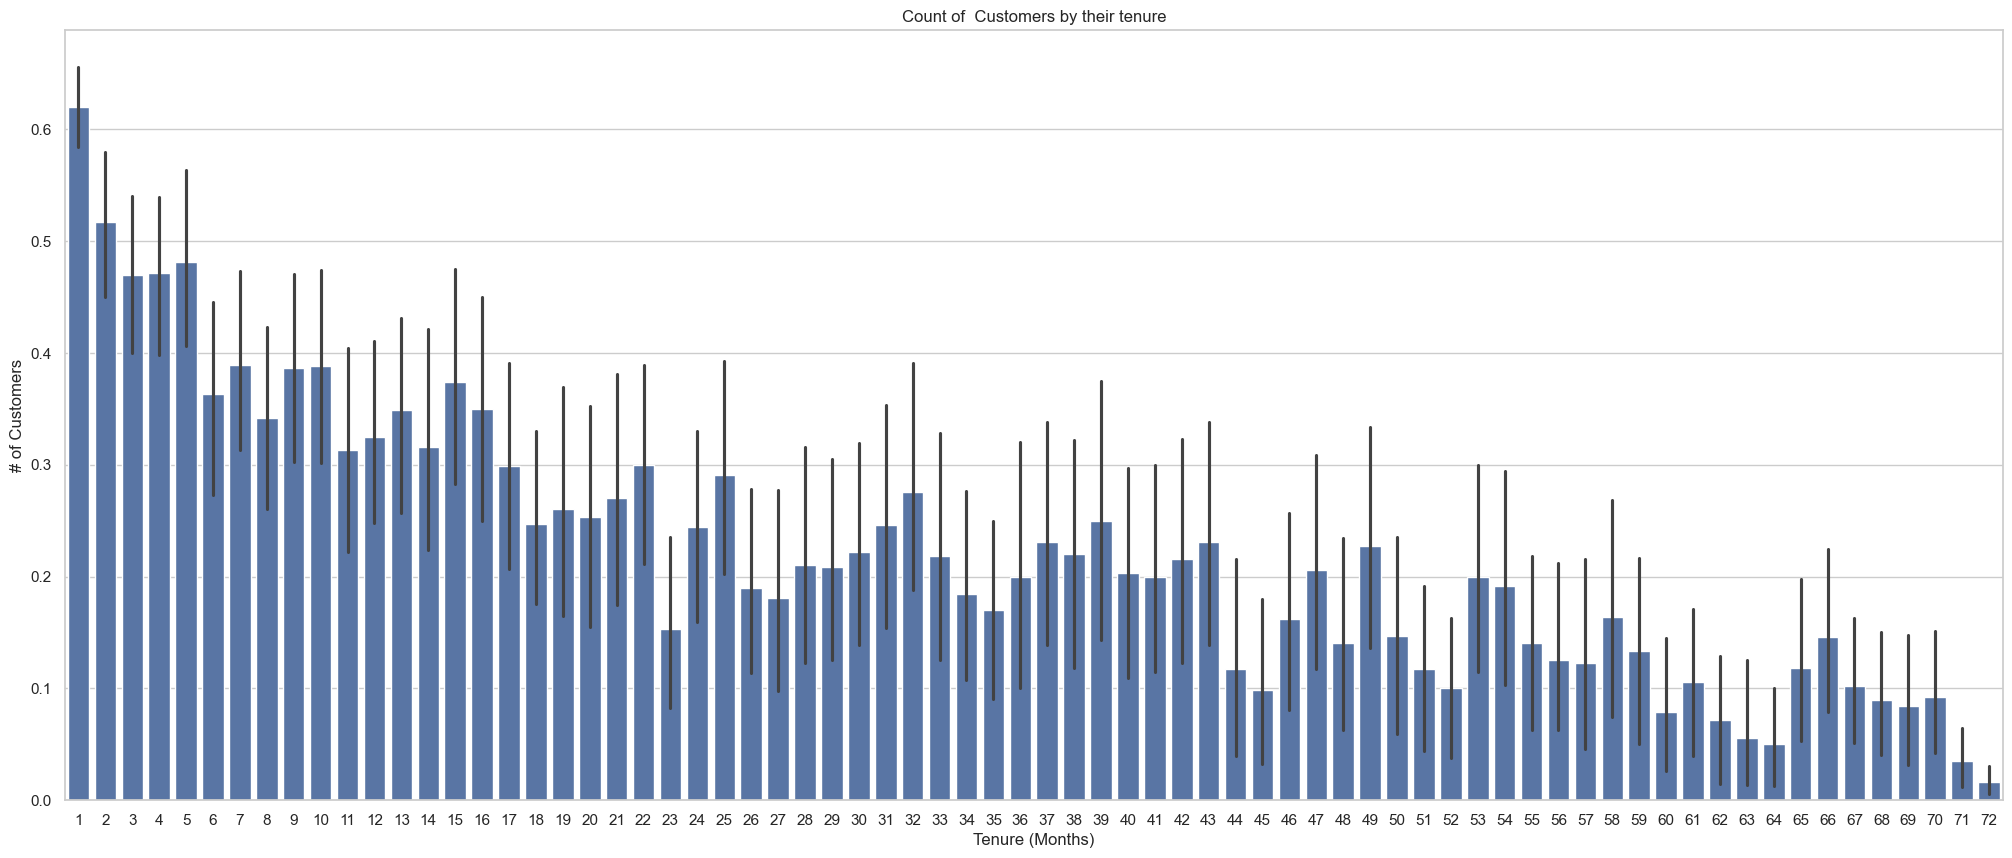

In [274]:
plt.figure(figsize=(25,10))

ax = sns.barplot(x="tenure", y="churn", data=df)
ax.set_ylabel("# of Customers")
ax.set_xlabel("Tenure (Months)")
ax.set_title("Count of  Customers by their tenure")

In [275]:
df['gender'].value_counts(normalize=True)

gender
Male      0.504693
Female    0.495307
Name: proportion, dtype: float64

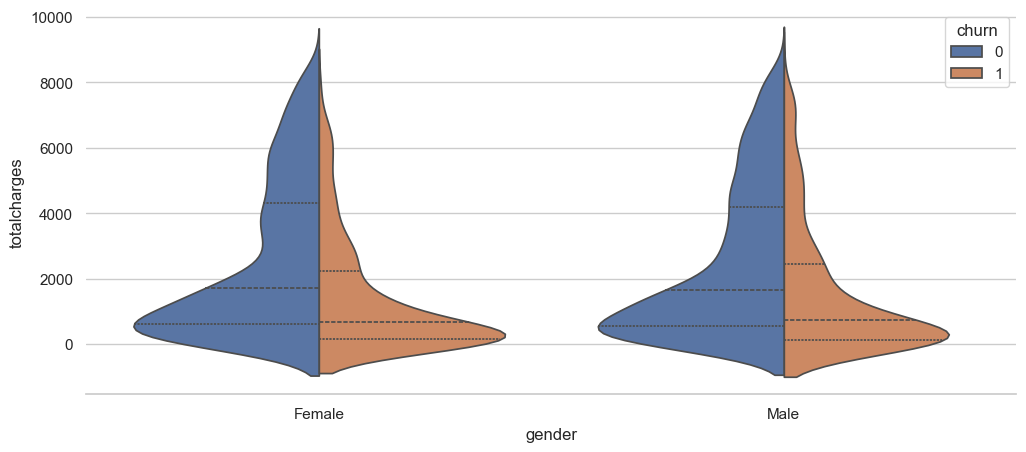

In [276]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="gender", y="totalcharges", hue="churn",
               split=True, inner="quart",
               #palette={"Yes": "Yes", "No": "No"},
               data=df)
sns.despine(left=True)

In [277]:
df = df.drop(['gender'], axis=1)

In [278]:
n_by_state = df.groupby("tenure").count()
n_by_state.head(10)

,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,streaming,huge_family
tenure,,,,,,,,,,,,,,,,,,,,
1,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613
2,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238
3,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
4,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176
5,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133
6,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110
7,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131
8,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123
9,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119


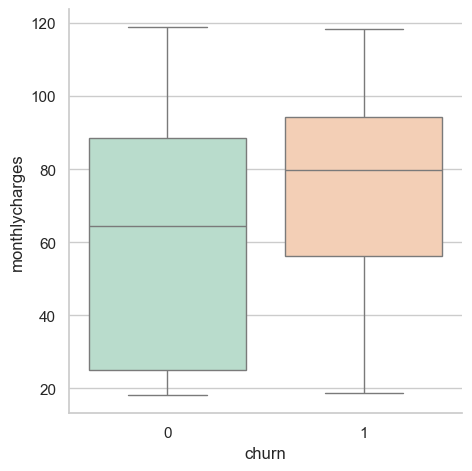

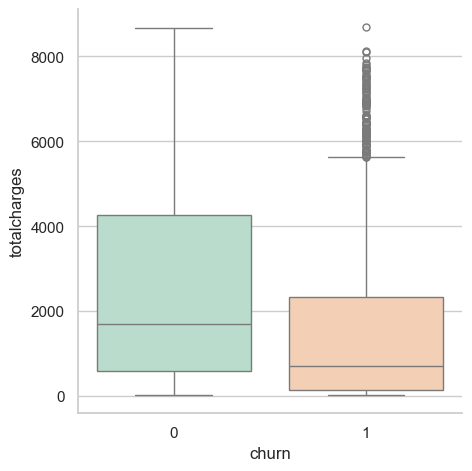

In [281]:
g = sns.catplot(
    x="churn",
    y="monthlycharges",
    data=df,
    kind="box",
    palette="Pastel2",
    hue="churn",
    legend=False
)
g = sns.catplot(
    x="churn",
    y="totalcharges",
    data=df,
    kind="box",
    palette="Pastel2",
    hue="churn",
    legend=False
)


In [282]:
df.onlinesecurity.value_counts(normalize=True)

onlinesecurity
No                     0.497298
Yes                    0.286547
No internet service    0.216155
Name: proportion, dtype: float64

In [283]:
df.techsupport.value_counts(normalize=True)

techsupport
No                     0.493743
Yes                    0.290102
No internet service    0.216155
Name: proportion, dtype: float64

In [284]:
df[df['churn'] == 'Yes'].onlinesecurity.value_counts(normalize=True)
df[df['churn'] == 'No'].onlinesecurity.value_counts(normalize=True)
df[df['churn'] == 'Yes'].techsupport.value_counts(normalize=True)
df[df['churn'] == 'No'].techsupport.value_counts(normalize=True)

Series([], Name: proportion, dtype: float64)

In [285]:
df.columns

Index(['seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges',
       'totalcharges', 'churn', 'streaming', 'huge_family'],
      dtype='object')

In [286]:
# actually doesn't give me any results like I expected
df.drop(['huge_family'], axis=1, inplace=True)
# replace for one column streming
df.drop(['streaming'], axis=1, inplace=True)
df.drop(['streamingmovies'], axis=1, inplace=True)
# after research we can drop
df = df.drop(['phoneservice'], axis=1)
# drop OnlineSecurity
df = df.drop(['onlinesecurity'], axis=1)

In [287]:
df.head()

,seniorcitizen,partner,dependents,tenure,multiplelines,internetservice,onlinebackup,deviceprotection,techsupport,streamingtv,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,Yes,No,1,No phone service,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,No,No,34,No,DSL,No,Yes,No,No,One year,No,Mailed check,56.95,1889.50,0
2,0,No,No,2,No,DSL,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,0,No,No,45,No phone service,DSL,No,Yes,Yes,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [288]:
df.to_csv("mod_churn.csv", index=False)

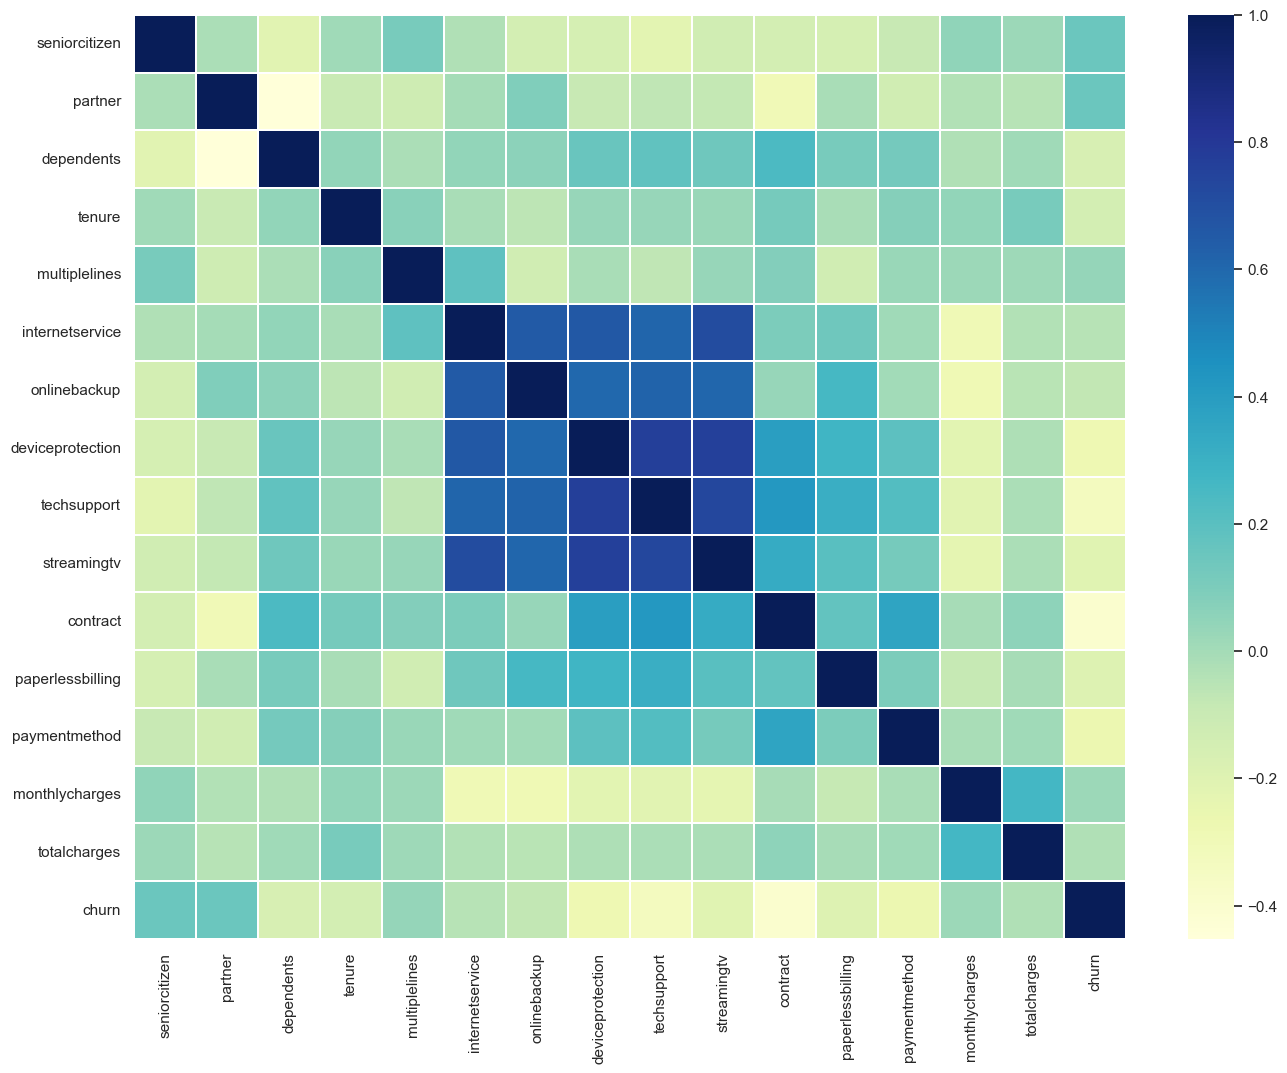

In [289]:
plt.figure(figsize=(16, 12))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
                 linewidths=.2, cmap="YlGnBu")

In [290]:
sum_info(df)

Number of rows: 7032, number of columns: 16


,Name,dtypes,Uniques,Row N1,Row N2,Last Row
0,seniorcitizen,int64,2,0,0,0
1,partner,object,2,Yes,No,No
2,dependents,object,2,No,No,No
3,tenure,int64,72,1,34,66
4,multiplelines,object,3,No phone service,No,No
5,internetservice,object,3,DSL,DSL,Fiber optic
6,onlinebackup,object,3,Yes,No,No
7,deviceprotection,object,3,No,Yes,Yes
8,techsupport,object,3,No,No,Yes
9,streamingtv,object,3,No,No,Yes
